# LABORATORIO 2: ANALISI STATISTICA E OLAP


a.a. 2024/2025, 13/03/2025

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Parte 1 analisi statistica**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming.
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

1. Importiamo il dataset:

In [3]:
#codice qui
ti = pd.read_csv('integrate_titles2.csv')

visualizziamo il dataset

In [4]:
#codice qui
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          4715 non-null   int64  
 1   Unnamed: 0            4715 non-null   int64  
 2   id                    4715 non-null   object 
 3   title                 4715 non-null   object 
 4   type                  4715 non-null   object 
 5   release_year          4715 non-null   int64  
 6   age_certification     2857 non-null   object 
 7   runtime               4715 non-null   int64  
 8   genres                4715 non-null   object 
 9   production_countries  4715 non-null   object 
 10  seasons               1716 non-null   float64
 11  imdb_id               4224 non-null   object 
 12  imdb_score            4170 non-null   float64
 13  imdb_votes            4165 non-null   float64
 14  tmdb_popularity       4679 non-null   float64
 15  tmdb_score           

In [5]:
#codice qui per vedere numero di elementi e informazioni sulle colonne
print(ti.shape) #numero di righe e di colonne del dataframe
print(ti.columns) #informazioni sulle colonne

(4715, 24)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'title', 'type', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'director', 'country', 'date_added', 'rating', 'duration',
       'year', 'month', 'day'],
      dtype='object')


**Parte 1. Statistiche di base e analisi OLAP**

Calcoliamo alcune statistiche di base, sulle colonne imdb_score e tmdb_score:
1. Media;
2. Deviazione standard;
3. Varianza;
4. Moda;
5. Mediana.

prima di tutto verifichiamo che non ci siano valori nulli

In [6]:
#codice qui verifica che non ci siano valori nulli

print(ti['tmdb_score'].isnull().sum())
print(ti['imdb_score'].isnull().sum())

159
545


proviamo a riempire questi valori nulli con il valore medio degli elementi non nulli. Iniziamo con imdb

In [7]:
#calcolo media non nulli
media_imdb = ti['imdb_score'].mean()

#trovo indici nulli di ibmdb_score
indici_nulli = ti[ti['imdb_score'].isnull()].index

#trovo indici non nulli di ibmdb_score
indici_non_nulli = ti[ti['imdb_score'].notnull()].index

#sostituzione con loc su indici nulli
ti.loc[ti['imdb_score'].isnull(), 'imdb_score'] = media_imdb
print(ti['imdb_score'])

0       6.595947
1       8.100000
2       7.200000
3       7.300000
4       8.200000
          ...   
4710    8.100000
4711    8.300000
4712    6.595947
4713    9.000000
4714    6.800000
Name: imdb_score, Length: 4715, dtype: float64


stessa cosa per tmdb

In [23]:
#calcolo media non nulli
media_imdb = ti['tmdb_score'].mean()

#trovo indici nulli di ibmdb_score
indici_nulli = ti[ti['tmdb_score'].isnull()].index

#trovo indici non nulli di ibmdb_score
indici_non_nulli = ti[ti['tmdb_score'].notnull()].index

#sostituzione con loc su indici nulli
ti.loc[ti['tmdb_score'].isnull(), 'tmdb_score'] = media_imdb
print(ti['tmdb_score'])

0       6.737944
1       7.783000
2       7.406000
3       7.200000
4       7.804000
          ...   
4710    6.737944
4711    8.500000
4712    6.737944
4713    6.737944
4714    8.000000
Name: tmdb_score, Length: 4715, dtype: float64


calcoliamo quindi le statistiche richieste

In [10]:
#statistiche richieste per imdb_score e tmdb_score
#media
print("Media di imdb_score e di tmdb_score:")
print(ti['imdb_score'].mean())
print(ti['tmdb_score'].mean())
print()

#varianza
print("Varianza di imdb_score e di tmdb_score:")
print(ti['imdb_score'].var())
print(ti['tmdb_score'].var())
print()

#deviazione standard
print("Deviazione di imdb_score e di tmdb_score:")
print(ti['imdb_score'].std())
print(ti['tmdb_score'].std())
print()

#moda
print("Moda di imdb_score e di tmdb_score:")
print(ti['imdb_score'].mode())
print(ti['tmdb_score'].mode())
print()

#mediana
print("Mediana di imdb_score e di tmdb_score:")
print(ti['imdb_score'].median()) 
print(ti['tmdb_score'].median())
print()



Media di imdb_score e di tmdb_score:
6.595947242206234
6.73794446883231

Varianza di imdb_score e di tmdb_score:
1.0990117752213164
1.279505460108319

Deviazione di imdb_score e di tmdb_score:
1.0483376246330742
1.1311522709645765

Moda di imdb_score e di tmdb_score:
0    6.595947
Name: imdb_score, dtype: float64
0    7.0
Name: tmdb_score, dtype: float64

Mediana di imdb_score e di tmdb_score:
6.595947242206234
6.8



stampiamo i valori di imdb_score, sortiamo l'array in ordine crescente e calcoliamo manualmente la mediana (elemento centrale se distribuzione ha numero di elementi dispari, oppure media tra quello centrale e il successivo, nel caso in cui sia pari).

In [13]:
#sorted
sorted = np.sort(ti['imdb_score'])
n = len(sorted)  # Numero di elementi
if n % 2 == 1:  # Se il numero di elementi è dispari
    median = sorted[n // 2]
else:  # Se è pari, facciamo la media dei due elementi centrali
    median = (sorted[n // 2 - 1] + sorted[n // 2]) / 2

In [14]:
print(sorted.tolist())
print(median)
print(ti['tmdb_score'].isnull().sum())
print(ti['imdb_score'].isnull().sum())

[1.5, 1.6, 1.7, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,

ora facciamo la stessa cosa, ma senza riempire i valori nulli.
Le funzioni che calcolano le statistiche in pandas, hanno un'opzione dropna=True di default, quindi non considerano i valori nulli, in automatico.  

In [18]:
integrate_titles = pd.read_csv("integrate_titles2.csv")

In [24]:
#codice qui
media = integrate_titles['imdb_score'].mean()
standard_dev = integrate_titles['imdb_score'].std()
variance = integrate_titles['imdb_score'].var()
mode = integrate_titles['imdb_score'].mode()
median = integrate_titles['imdb_score'].median()
print('media =' + str(media))
print('\n')
print('standard_dev =' + str(standard_dev))
print('\n')
print('variance =' + str(variance))
print('\n')
print('mode =' + str(mode[0]))
print('\n')
print('median =' + str(median))

media =6.595947242206234


standard_dev =1.1147565025873383


variance =1.2426820600607544


mode =6.6


median =6.7


come dimostrazione, eliminiamo le righe che contengono un valore nullo su imdb_score e ripetiamo le statistiche

In [25]:
integrate_titles = pd.read_csv("integrate_titles2.csv")
integrate_titles = integrate_titles.dropna(axis=0, subset=['imdb_score'])


In [26]:
#codice qui
media = integrate_titles['imdb_score'].mean()
standard_dev = integrate_titles['imdb_score'].std()
variance = integrate_titles['imdb_score'].var()
mode = integrate_titles['imdb_score'].mode()
median = integrate_titles['imdb_score'].median()
print('media =' + str(media))
print('\n')
print('standard_dev =' + str(standard_dev))
print('\n')
print('variance =' + str(variance))
print('\n')
print('mode =' + str(mode[0]))
print('\n')
print('median =' + str(median))

media =6.595947242206234


standard_dev =1.1147565025873383


variance =1.2426820600607544


mode =6.6


median =6.7


A questo punto, usiamo quest'ultima versione  e predisponiamo il nostro dataset per un'analisi OLAP. Per prima cosa, quantizziamo lo score di IMBD. Possiamo usare questa quantizzazione:
1. BAD = [0,4.9];
2. SUFFICIENT = [5,5.9];
3. GOOD = [6,6.9];
4. VERY GOOD = [7,7.9];
5. EXCELLENT = [8,10].

**tip**

Dobbiamo utilizzare la funzione between di pandas (between(min_range,max_range,'both'), la funzione loc per accedere ai valori del dataframe e creare una nuova colonna che chiamiamo 'imdb_score_quant


In [27]:
#codice qui
integrate_titles.loc[integrate_titles['imdb_score'].between(0, 4.9, 'both'), 'imdb_score_quant'] = 'LOW'
integrate_titles.loc[integrate_titles['imdb_score'].between(5, 5.9, 'both'), 'imdb_score_quant'] = 'SUFFICIENT'
integrate_titles.loc[integrate_titles['imdb_score'].between(6, 6.9, 'both'), 'imdb_score_quant'] = 'GOOD'
integrate_titles.loc[integrate_titles['imdb_score'].between(7, 7.9, 'both'), 'imdb_score_quant'] = 'VERY GOOD'
integrate_titles.loc[integrate_titles['imdb_score'].between(8, 10, 'both'), 'imdb_score_quant'] = 'EXCELLENT'

quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']


visualizziamo la colonna che abbiamo aggiunto

In [36]:
#codice qui
print(integrate_titles['imdb_score_quant'].value_counts())
print()


imdb_score_quant
GOOD          1418
VERY GOOD     1242
SUFFICIENT     781
EXCELLENT      427
LOW            302
Name: count, dtype: int64



Facciamo la stessa cosa per gli anni di uscita (release_year). Usiamo questa quantizzazione:

1. VERY OLD = [1900,1980];
3. OLD = [1981,2000].
4. RECENT = [2001,2015];
5. VERY RECENT = [2016,2023].



In [38]:
#CODICE QUI
integrate_titles.loc[integrate_titles['release_year'].between(1900, 1980, 'both'), 'release_year_quant'] = 'VERY OLD'
integrate_titles.loc[integrate_titles['release_year'].between(1981, 2000, 'both'), 'release_year_quant'] = 'OLD'
integrate_titles.loc[integrate_titles['release_year'].between(2001, 2010, 'both'), 'release_year_quant'] = 'RECENT'
integrate_titles.loc[integrate_titles['release_year'].between(2011, 2020, 'both'), 'release_year_quant'] = 'VERY RECENT'

quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']

visualizziamo anche questa colonna

In [39]:
#codice qui 
print(integrate_titles['release_year_quant'].value_counts())
print()


release_year_quant
VERY RECENT    2980
RECENT          351
OLD             239
VERY OLD        115
Name: count, dtype: int64



Infine, utilizziamo TYPE che risulta già quantizzato.

In [46]:
integrate_titles['type'].isnull().sum()

np.int64(0)

visualizziamo i possibili valori di type

**tip** usiamo la funzione unique di numpy

In [43]:
#codice qui
np.unique(integrate_titles['type'])
quantize_type = ['MOVIE','SHOW']

come vediamo sono soltanto MOVIE and SHOW.

il programma a cui sono iscritti gli studenti è già discreto e quantizzato. Visualizziamo allora le colonne aggiunte

**Parte 2. Visualizzazione dei dati e OLAP**

Abbiamo visto che esistono diverse modalita' di visualizzazione dei dati.

In base al tipo di dato, alcune sono appropriate, altre possono non esserlo.

La visualizzazione dei dati dipende da cosa vogliamo **comunicare**
con i dati.

Proviamo a visualizzare il dato in forma quantizzata per OLAP, poi faremo alcune visualizzazioni. Dobbiamo prima di tutto contare il numero di occorrenze di ciascun valore. Sarà sufficiente usare la funzione value_counts di pandas.
Ricordiamo che abbiamo:
- 5 valori possibili per Score;
- 4 valori possibili per release_year;
- 2 valori possibili per type

In [44]:
#codice qui
OLAP = np.zeros((5,4,2))
for z in range(0,len(quantize_type)):
  Awards_prog_z = integrate_titles[integrate_titles['type']==quantize_type[z]]
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      OLAP[i,j,z] = np.sum((Awards_prog_z['imdb_score_quant'] == quantize_imdb_score[i]) &(Awards_prog_z['release_year_quant'] == quantize_release_year[j]))

Per prima cosa, facciamo uno **slicing** rispetto a type

In [45]:
#codice qui
print('MOVIE')
slice0 = OLAP[:,:,0]
slice0

MOVIE


array([[  2.,  18.,  14., 187.],
       [ 19.,  41.,  70., 422.],
       [ 45.,  82.,  83., 661.],
       [ 38.,  41.,  68., 435.],
       [  6.,   7.,  24.,  62.]])

visualizziamo ora questa matrice, con una heatmap. Dobbiamo usare matplotlib e la funzione imshow.

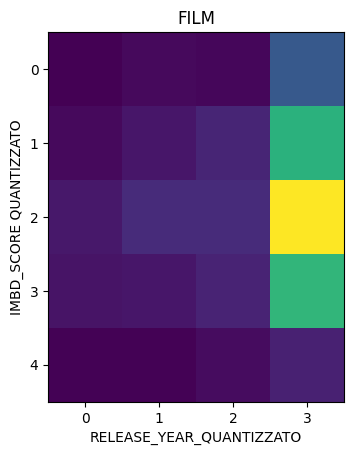

In [47]:
#codice qui
plt.figure()
plt.title('FILM')
plt.ylabel('IMBD_SCORE QUANTIZZATO')
plt.xlabel('RELEASE_YEAR_QUANTIZZATO')
plt.imshow(slice0)

In [55]:
print('SHOW')
slice1 = OLAP[:,:,1]
slice1
#codice qui

SHOW


array([[  0.,   0.,   5.,  38.],
       [  1.,   2.,  11., 111.],
       [  0.,  16.,  18., 329.],
       [  0.,  20.,  25., 488.],
       [  4.,  12.,  33., 247.]])

stessa cosa per show

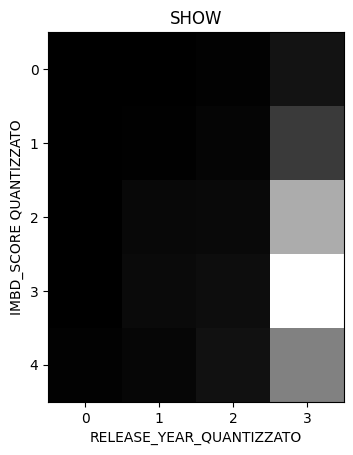

In [56]:
#codice qui
plt.figure()
plt.title('SHOW')
plt.ylabel('IMBD_SCORE QUANTIZZATO')
plt.xlabel('RELEASE_YEAR_QUANTIZZATO')
plt.imshow(slice1,cmap='gray')

Notiamo (tra le altre cose), con questo slicing, che la maggior parte delle serie sono molto recenti, e che molte di esse sono valutate come very good. Mentre la maggior parte dei film molto recenti sono valutati good.

adesso facciamo slicing rispetto al release_year, visualizzando soltanto i VERY OLD.


In [57]:
print('VERY OLD')
slice2 = OLAP[:,0,:]
slice2
#codice qui

VERY OLD


array([[ 2.,  0.],
       [19.,  1.],
       [45.,  0.],
       [38.,  0.],
       [ 6.,  4.]])

possiamo notare come con questa visualizzazione, sia evidente che non il numero di show sia molto piccolo rispetto ai film, la cui valutazione è per lo più media.

proviamo a visualizzare questa informazione con un grafico a linea.

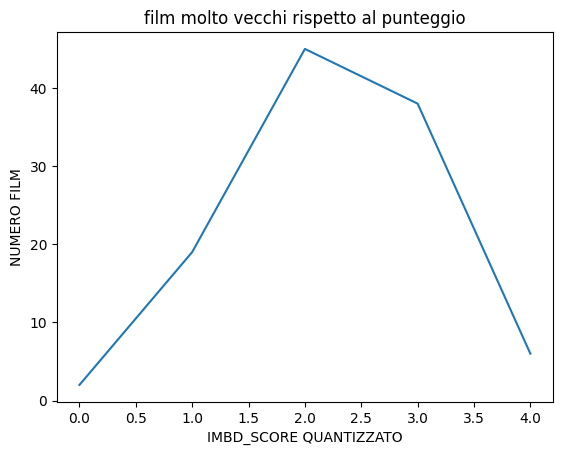

In [58]:
#codice qui
plt.figure()
plt.title('film molto vecchi rispetto al punteggio')
plt.xlabel('IMBD_SCORE QUANTIZZATO')
plt.ylabel('NUMERO FILM')
plt.plot(slice2[:,0])

a questo punto facciamo un dicing, visualizzando i film che hanno avuto una votazione "GOOD" e che siano "VERY RECENT".



In [59]:
print("GOOD and VERY RECENT")
slice_good_and_VERYRECENT = OLAP[2,3,:]
slice_good_and_VERYRECENT

GOOD and VERY RECENT


array([661., 329.])

visualizziamo questa informazione con un bar plot

<BarContainer object of 2 artists>

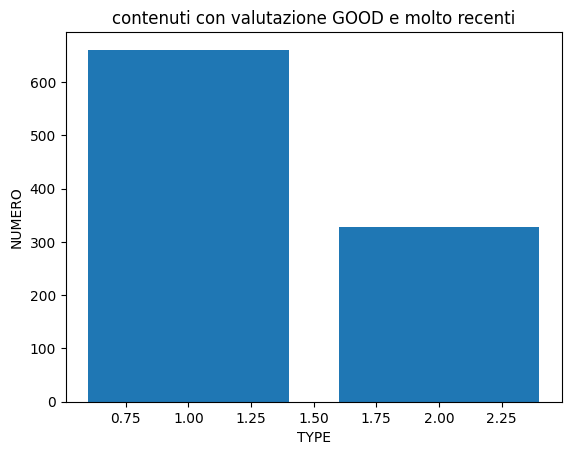

In [60]:
plt.figure()
plt.title('contenuti con valutazione GOOD e molto recenti')
plt.xlabel('TYPE')
plt.ylabel('NUMERO')
plt.bar([1,2],slice_good_and_VERYRECENT)

notiamo che ci sono più film che show.

A questo punto, vogliamo trovare un modo per visualizzare il numero di contenuti usciti nei vari anni, allo scopo di capire nuovamente se ci siano dei trend. Come possiamo fare?

In [61]:
#codice qui
num_awards = integrate_titles['release_year'].value_counts(sort=True,normalize=True)


<Axes: xlabel='release_year'>

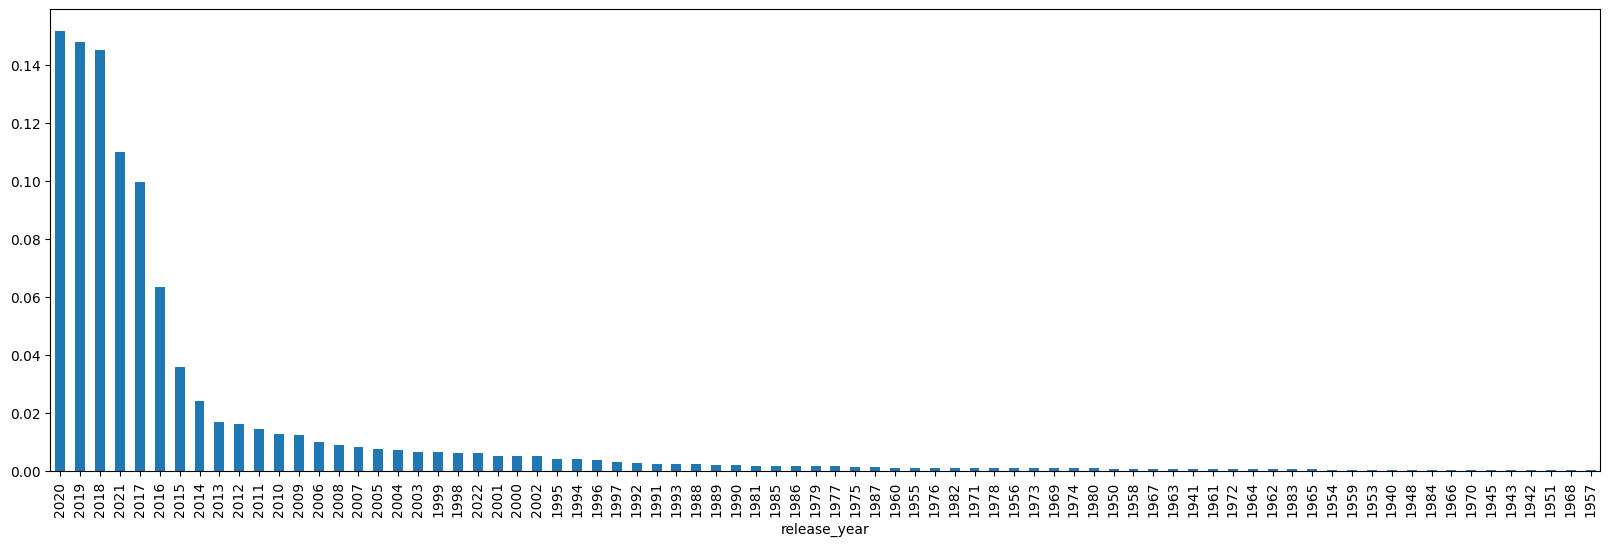

In [62]:
#codice qui
fig = plt.figure(figsize=(20, 6))
num_awards.plot(kind='bar')

Di fatto, vorremo un istogramma (o un diagramma a barre?) Esistono altri due metodi per fare questo plot.

Ne vediamo uno insieme.

<BarContainer object of 10 artists>

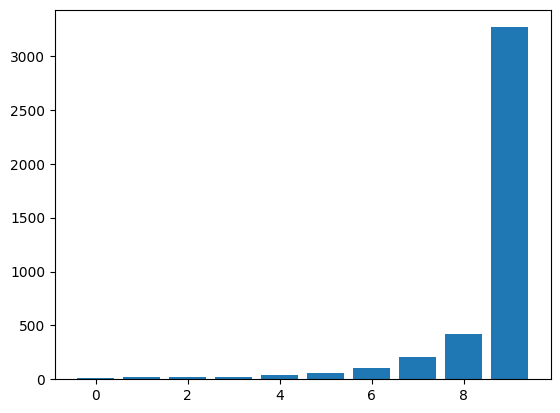

In [63]:
histo = np.histogram(integrate_titles['release_year'],bins=10)
plt.bar(x=np.asarray(range(10)),height=histo[0])

L'altro consiste nell'usare la funzione 'hist' della libreria matplotlib. Provate a farlo!

(array([  10.,   17.,   23.,   23.,   42.,   59.,  105.,  208.,  416.,
        3267.]),
 array([1940. , 1948.2, 1956.4, 1964.6, 1972.8, 1981. , 1989.2, 1997.4,
        2005.6, 2013.8, 2022. ]),
 <BarContainer object of 10 artists>)

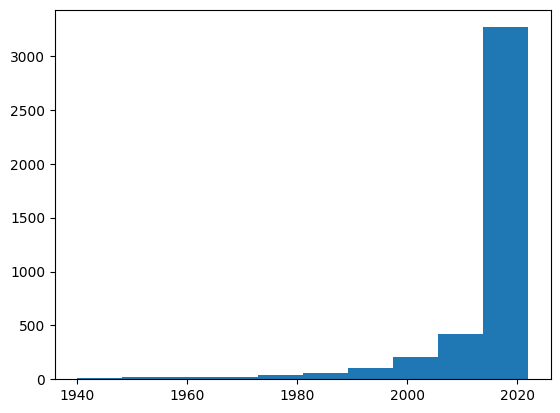

In [64]:
#codice qui
plt.figure()
plt.hist(integrate_titles['release_year'],bins=10)

Esiste un modo alternativo di visualizzare questa informazione fornendo più dettagli?

Usate i box plot

funzione pandas boxplot (argomenti: column = 'colonna da visualizzare', by ='colonna rispetto a cui dividere')

Text(0.5, 1.0, 'box plot per tipo (orizzontali)')

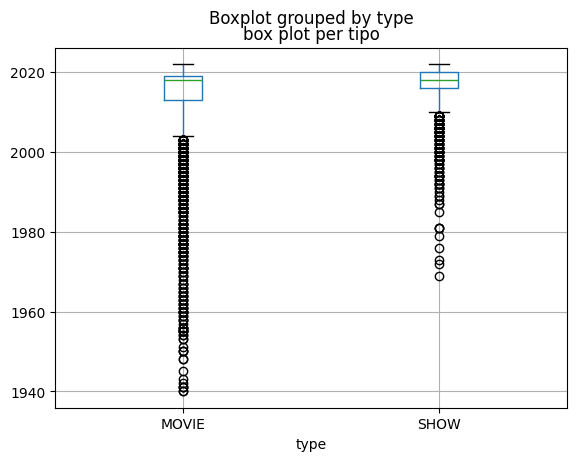

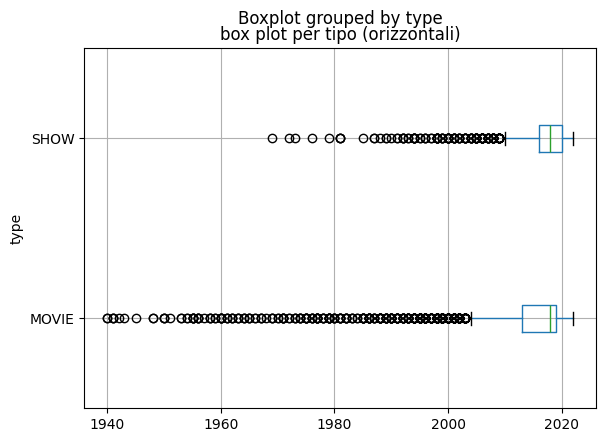

In [65]:
#codice qui
integrate_titles.boxplot(column='release_year', by='type')
plt.title('box plot per tipo')

integrate_titles.boxplot(column='release_year', by='type',vert=False)
plt.title('box plot per tipo (orizzontali)')

I box plot ci danno informazioni sulla distribuzione, non solo sulla media.

Infine, facciamo un esempio di roll-up e dripping-down.
Utilizziamo la colonna date_added, che abbiamo sistemato durante il primo laboratorio.

In [66]:
integrate_titles.head()

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,production_countries,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",['US'],...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",['US'],...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",['US'],...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",['GB'],...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


come roll-up, visualizziamo con diagramma a barre, il numero di film per decennio dal 1950-1960 al 2020-2030

[  5.   2.   4.   9.  22.  53. 632.   0.]


<BarContainer object of 8 artists>

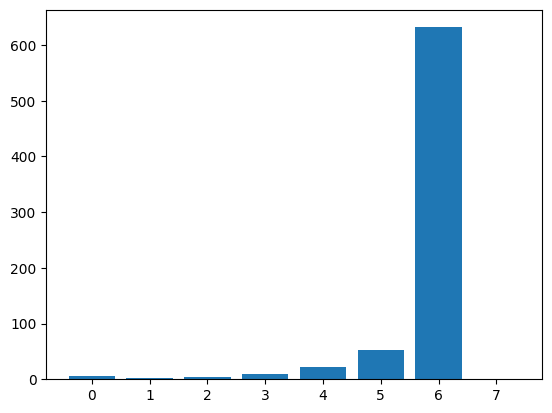

In [67]:
num_film = np.zeros((8))

for i in range(1,8):
  num_film[i-1] = np.sum(((integrate_titles['release_year'].astype(int) - 1950)/10)==float(i))

print(num_film)

plt.bar(x=np.asarray(range(8)),height=num_film)

come esempio di dripping down, selezioniamo l'anno 2020, e visualizziamo la stessa informazione di prima (numero di film usciti per mese)

[39. 35. 50. 61. 49. 56. 59. 53. 56. 63. 49. 62.]


<BarContainer object of 12 artists>

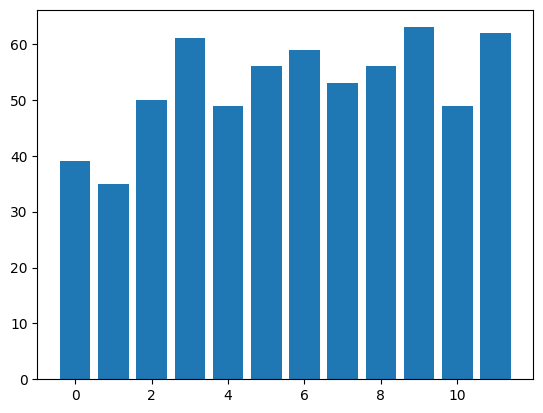

In [68]:
anno_2022 = integrate_titles[integrate_titles['release_year']==2020]

num_film = np.zeros((12))

for i in range(1,13):
  num_film[i-1] = np.sum(anno_2022['month']==float(i))

print(num_film)

plt.bar(x=np.asarray(range(12)),height=num_film)